# Linear Regression 

In [1]:
# change the notebook's behaviour to allow multiple outputs. 

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [11]:
#To import all teh packages needed

from sklearn import linear_model as lm
import scipy as sc
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import pylab


In [28]:
# Import a CSV FIle 
# Method 1 :- where 'Concrete_Data.xls' is available in Jupyterm home folder 

Concrete_Data_DF = pd.read_excel('Concrete_Data.xls' )
#Concrete_Data_DF.head()

cdf = Concrete_Data_DF.iloc[ : , 0:9]
cdf.head()

#typr pf cdf

type(cdf)

,Cement,Blast Furnace Slag ),Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


pandas.core.frame.DataFrame

In [38]:
#Renaming the response var

cdf = cdf.rename(columns = {'Cement ':'Cement','Concrete compressive strength':'strength','Water  ' : 'Water'})
 
list(cdf.columns.values) 

['Cement',
 'Blast Furnace Slag )',
 'Fly Ash ',
 'Water',
 'Superplasticizer ',
 'Coarse Aggregate  ',
 'Fine Aggregate ',
 'Age (day)',
 'strength']

Text(0.5, 0, 'Cement')

Text(0, 0.5, 'Strength')

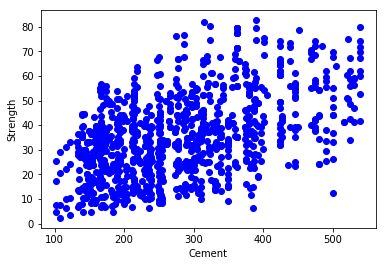

In [37]:
### Checking which Cement is linearly related with response var

plt.scatter(cdf.Cement, cdf.strength,  color='blue')
plt.xlabel("Cement")
plt.ylabel("Strength")
plt.show()

Text(0.5, 0, 'Water')

Text(0, 0.5, 'Strength')

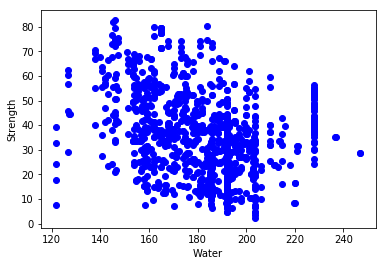

In [39]:
### Checking which Water is linearly related with response var


plt.scatter(cdf.Water, cdf.strength,  color='blue')
plt.xlabel('Water')
plt.ylabel("Strength")
plt.show()

In [51]:
type(cdf)

cdf.head()

pandas.core.frame.DataFrame

,Cement,Blast Furnace Slag ),Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [73]:
x = cdf[["Cement"]]
y = cdf[["strength"]]
x ; y

,Cement
0,540.0
1,540.0
2,332.5
3,332.5
4,198.6
5,266.0
6,380.0
7,380.0
8,266.0
9,475.0


,strength
0,79.986111
1,61.887366
2,40.269535
3,41.052780
4,44.296075
5,47.029847
6,43.698299
7,36.447770
8,45.854291
9,39.289790


In [75]:
## Seeing above two var decided that Cement is linearly relates to strength when compared to water
## so going ahead with Cement for linear regression. If intrested can check other variables also.

# Split into training and test set and creating x and y list varaibles from the respective colnames

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.2, 
                                                    random_state= 100 
                                                    )



In [77]:
## Applying linear regression model...Train the data 

lr = lm.LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [85]:
# Predict the test data
predval = lr.predict(X_test)




In [87]:
# coefficients

print('Coefficients: \n', lr.coef_)

Coefficients: 
 [[0.07795895]]


In [97]:
from sklearn.metrics import mean_squared_error, r2_score


print("Residual sum of squares (MSE):" ,  mean_squared_error(predval , y_test))
print("R2-score:" , r2_score(predval , y_test) )

Residual sum of squares (MSE): 222.51992465773148
R2-score: -2.5249661620228463


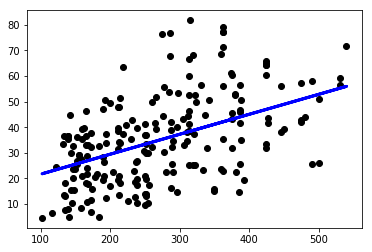

In [98]:
# Plot outputs  X_train, X_test, y_train, y_test
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, predval, color='blue', linewidth=3)